In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_preprocessing.data_loading as dl
import data_preprocessing.data_preprocess as dp
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pipeline_helper_functions.schofield_model_helper as sm

In [2]:
year = "2025"
df = dl.get_gesis_data(year=year)

In [3]:
party_map = dl.load_party_leaders(year=year)
# fetch the external valences
valences = dp.get_valence_from_gesis(politicians=party_map, year=year)  

In [4]:
valences

,Party_Name,politician,valence
0,90/Greens,habeck,0.298248
1,AfD,weidel,-0.396030
2,BSW,wagenknecht,-0.150842
3,CDU/CSU,merz,0.236557
4,FDP,lindner,-0.124270
5,LINKE,vanaken,0.056361
6,SPD,scholz,0.093695


In [5]:
df["more social service, more taxes"].unique()

array([ 5.,  3.,  8.,  6.,  7.,  1., 11.,  4.,  9.,  2., 10.])

In [6]:
# df[["who did you vote for:first vote", "who did you vote for:second vote"]].head(10)
df["who did you vote for:second vote"].unique()

array([  6.,   4.,   7.,   1., 322., 801., 392.,   5.])

In [7]:
df["year of birth"].unique()

array(['1999', '2005', '1983', '1962', '1998', '1964', '1941', '1956',
       '1997', '1966', '1985', '1969', '1955', '1960', '1995', '1963',
       '2003', '1980', '1971', '1993', '1943', '1938', '1945', '1946',
       '1949', '1951', '1957', '1959', '1961', '1970', '1979', '1982',
       '2000', '2002', '2007', '1935 oder frueher', '1944',
       '-99 keine Angabe', '1984', '2006', '1948', '1953', '1954', '2004',
       '1981', '1987', '1991', '1990', '1974', '1973', '1939', '1967',
       '1937', '1952', '1958', '1972', '1965', '2008', '1947', '1989',
       '1942', '1968', '1976', '1988', '1950', '1978', '1986', '1996',
       '1992', '1994', '1940', '1975', '1977', '1936', '2001', '2009'],
      dtype=object)

In [8]:
a = "asda"
print(f"'{a}' is not an int")

'asda' is not an int


In [14]:
x_var = "Opposition to Immigration"
y_var = "Welfare State"
year  = "2025"
_, df = dp.get_raw_party_voter_data(x_var=x_var, y_var=y_var, year=year)

# df.drop(df[df["year of birth"] == '-99 keine Angabe'])
# df["year of birth"].unique()

df["year of birth"] = pd.to_numeric(df["year of birth"], errors="coerce")
df.dropna(subset="year of birth", inplace=True, ignore_index=True)

/Users/hilmar/Desktop/projects/studium/Case_Study_TUM25/data_preprocessing/data_loading.py:39: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
/Users/hilmar/Desktop/projects/studium/Case_Study_TUM25/data_preprocessing/data_loading.py:54: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_filtered = df_filtered.apply(pd.to_numeric, errors="ignore")
/Users/hilmar/Desktop/projects/studium/Case_Study_TUM25/data_preprocessing/data_loading.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_filtered['Year'] = (pd.to_datetime(df_filtered['Date'], dayfirst=True).dt.ye

In [15]:
def get_age(voter_df: pd.DataFrame, year_of_survey: int):
    if "year of birth" not in voter_df:
        print("haja")
        return
    def calculate_age(year): return year_of_survey - year
    voter_df["age"] = voter_df["year of birth"].apply(calculate_age)
    # voter_df.drop("year of birth", axis=1, inplace=True)
    return voter_df    


def get_age_bracket(voter_df: pd.DataFrame):
    brackets = {(18, 25): 0, (26, 35): 1, (36, 45): 2, (46, 55): 3, (56, 65): 4, (66, 200): 5}

    def find_bracket(age): 
        for (start, end), bracket in brackets.items(): 
            if start <= age <= end: 
                return bracket
            
    voter_df["bracket"] = voter_df["age"].apply(find_bracket)
    # voter_df.drop("age", axis=1, inplace=True)
    return voter_df



df = get_age(df, int(year))
df = get_age_bracket(df)

df

,Opposition to Immigration,Welfare State,who did you vote for:second vote,year of birth,"do you incline towards a party, if so which one",how strongly do you incline towards this party,Party_Name,party_choice,age,bracket
0,9.0,5.0,6.0,1999.0,4.0,3.0,90/Greens,0,26.0,1.0
1,9.0,3.0,6.0,2005.0,6.0,2.0,90/Greens,0,20.0,0.0
2,7.0,8.0,6.0,1983.0,6.0,2.0,90/Greens,0,42.0,2.0
3,7.0,6.0,4.0,1962.0,6.0,2.0,SPD,1,63.0,4.0
4,4.0,5.0,7.0,2005.0,7.0,2.0,LINKE,2,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6672,6.0,6.0,322.0,1957.0,322.0,2.0,AfD,4,68.0,5.0
6673,8.0,3.0,6.0,1977.0,801.0,2.0,90/Greens,0,48.0,3.0
6674,11.0,4.0,4.0,1969.0,801.0,2.0,SPD,1,56.0,4.0
6675,1.0,6.0,4.0,1966.0,801.0,2.0,SPD,1,59.0,4.0


In [16]:
df["who did you vote for:second vote"].value_counts()

who did you vote for:second vote
6.0      2005
1.0      1808
4.0       994
322.0     848
7.0       741
5.0       281
Name: count, dtype: int64

In [19]:
# for party in df["who did you vote for:second vote"].unique():
party = 6
(df[df["who did you vote for:second vote"] == party]["bracket"].value_counts()/len(df[df["who did you vote for:second vote"] == party])).sort_index()

bracket
0.0    0.101247
1.0    0.135162
2.0    0.145137
3.0    0.160599
4.0    0.200000
5.0    0.219451
Name: count, dtype: float64

<Axes: >

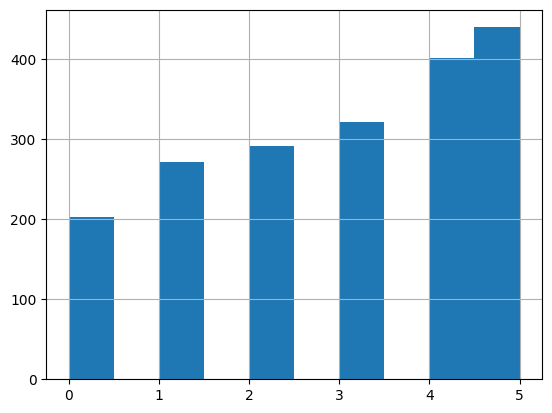

In [20]:
df[df["who did you vote for:second vote"] == party]["bracket"].hist()